In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno
from collections import defaultdict
%matplotlib inline

In [2]:
df = pd.read_csv('../MagicBricks.csv')
df.shape

(1259, 11)

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


#### Fixing Missing values First with appropriate imputations

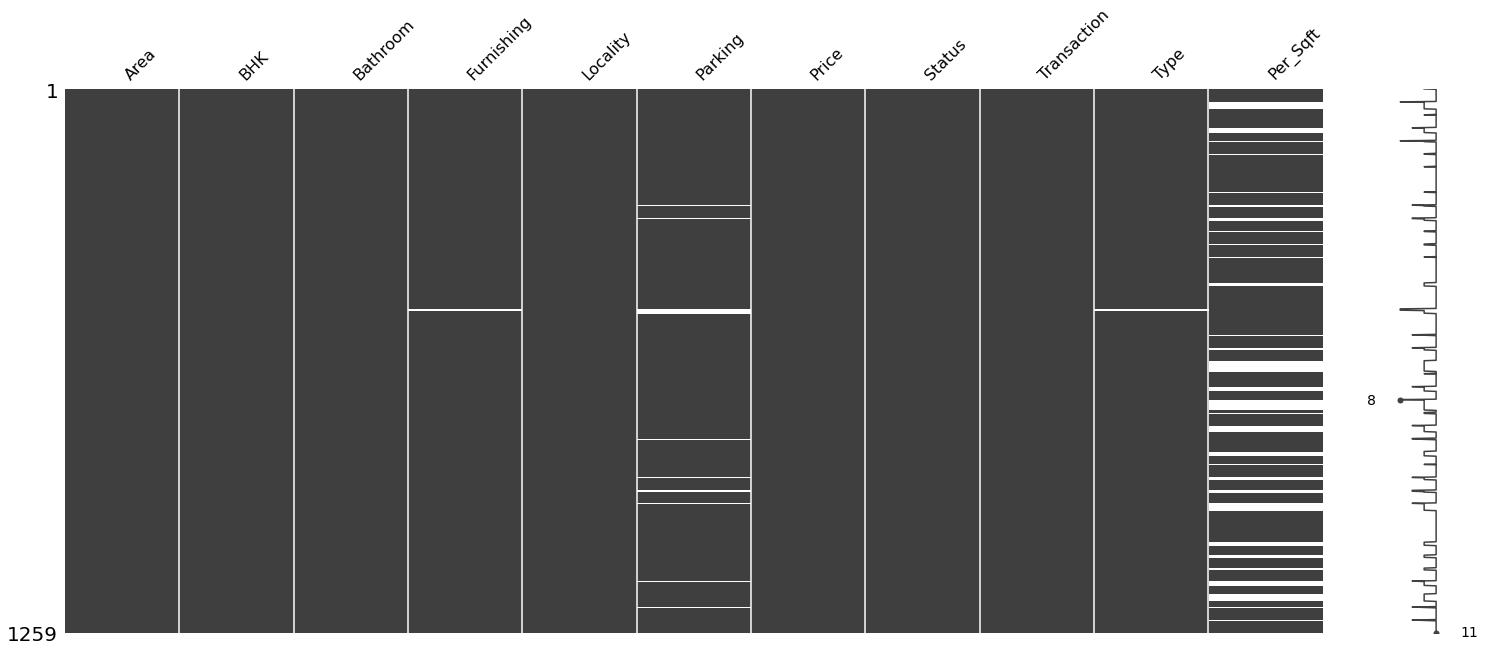

In [7]:
missingno.matrix(df)

In [10]:
df.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [9]:
df[['Price','Per_Sqft']].corr()

,Price,Per_Sqft
Price,1.000000,0.322859
Per_Sqft,0.322859,1.000000


##### Per Sqft doesn't look much good.! Let's just let it go for now as 20 percent of dataset is missing for it. Also it was found flawed during data exploration.

In [14]:
df.drop(columns=['Per_Sqft'], inplace=True)
numerical_cols.remove('Per_Sqft')

KeyError: "['Per_Sqft'] not found in axis"

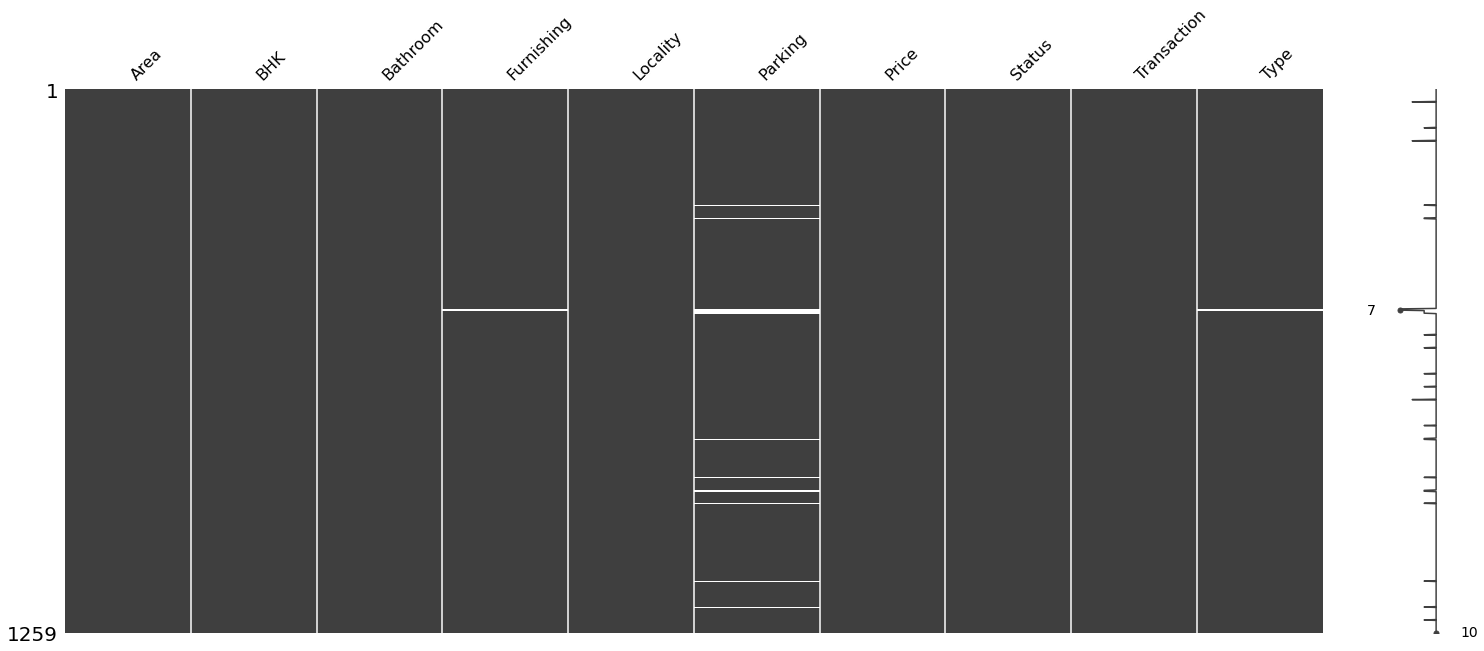

In [17]:
missingno.matrix(df)

#### Missing Parking Values
Probably missing parking values means no parking and hence 0

In [18]:
df.Parking.fillna(0,inplace=True)

In [20]:
df[df['Bathroom'].isna()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,0.0,13500000,Ready_to_move,Resale,Apartment
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,0.0,13500000,Ready_to_move,Resale,Apartment


In [28]:
df[(df['Area']>1000) & (df['BHK'] == 1)]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
30,1500.0000,1,NaN,Unfurnished,Lajpat Nagar 2,0.0,13500000,Ready_to_move,Resale,Apartment
120,1500.0000,1,NaN,Unfurnished,Lajpat Nagar 2,0.0,13500000,Ready_to_move,Resale,Apartment
894,4900.0000,1,1.0,Unfurnished,"DDA Lig Flats, Narela",1.0,1000000,Ready_to_move,New_Property,Apartment
895,2077.4327,1,1.0,Unfurnished,"DDA Flats Pocket 3, Narela",1.0,1000000,Ready_to_move,Resale,Builder_Floor


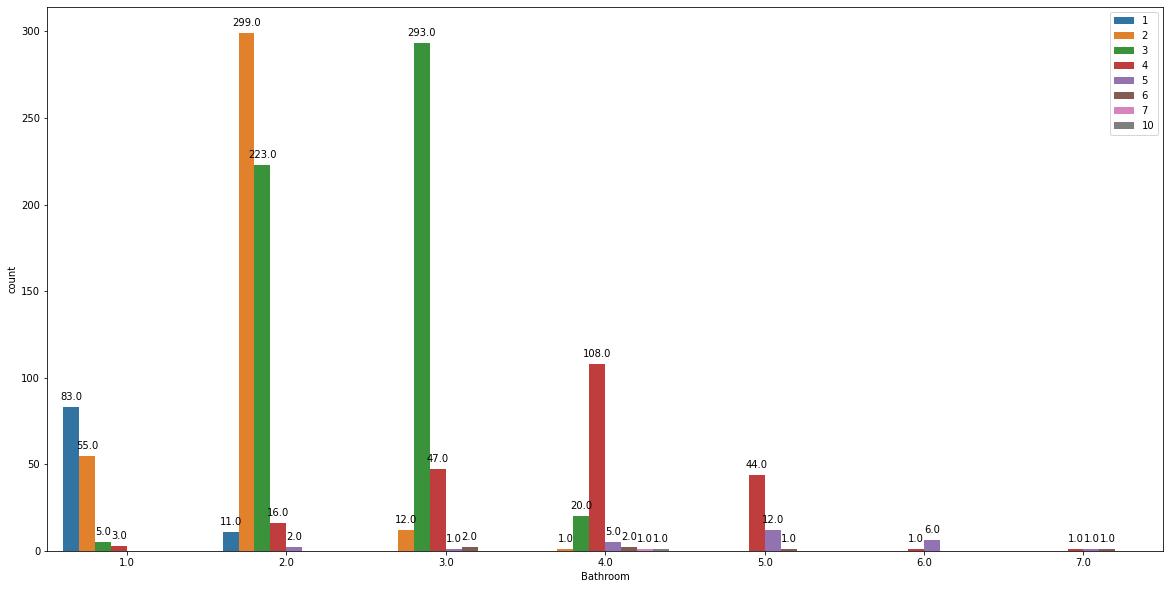

In [29]:
plt.figure(figsize=(20,10))
g = sns.countplot(x='Bathroom',hue='BHK', data=df)
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.legend(loc='upper right')

In [30]:
df.Bathroom.fillna(1,inplace=True)

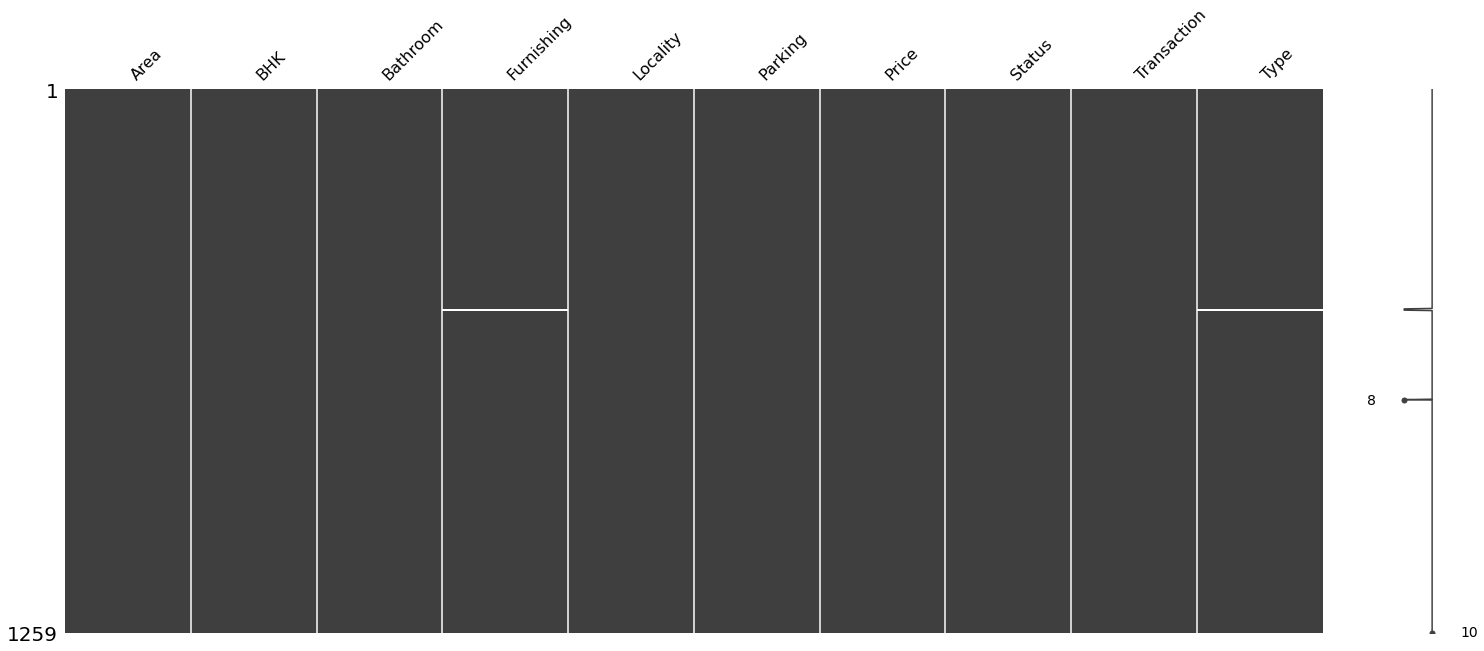

In [31]:
missingno.matrix(df)

In [32]:
df[df['Furnishing'].isna()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,2900000,Ready_to_move,Resale,NaN
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,17000000,Ready_to_move,Resale,NaN
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",0.0,25000000,Ready_to_move,Resale,NaN
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,10000000,Ready_to_move,Resale,NaN
719,1500.0,3,2.0,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN


In [34]:
df.iloc[719,:].Locality

'Sarita Vihar, Mathura Road carpet area 1500 sqft status Ready to Move floor 2 out of 4 floors transaction Resale ownership Freehold overlooking Main Road car parking 1 Open bathroom 2 balcony 2 furnishing Unfurnished For sale second third duplex .spacious 3 bedrooms with 2 washrooms drawing and dining and moduler kitchen one scooter garrage. read more Contact Agent View Phone No. Share Feedback Shree Balaji Real Estate Pvt. Ltd. Has Maximum Property Options Is the Top Agent of the Locality Is Trusted by All Users 21 Property Options in Sarita Vihar, Mathura Road Shree Balaji Real Estate Pvt. Ltd. Certified Agent Locality Superstar Maximum options in Sarita Vihar, Mathura Road'

In [36]:
df.iloc[719,3] = 'Unfurnished'
df.iloc[719,9] = 'Builder_Floor'

In [38]:
df[df['Furnishing'].isna()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,2900000,Ready_to_move,Resale,NaN
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,17000000,Ready_to_move,Resale,NaN
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",0.0,25000000,Ready_to_move,Resale,NaN
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,10000000,Ready_to_move,Resale,NaN


##### All seems to be from same area, consecutive

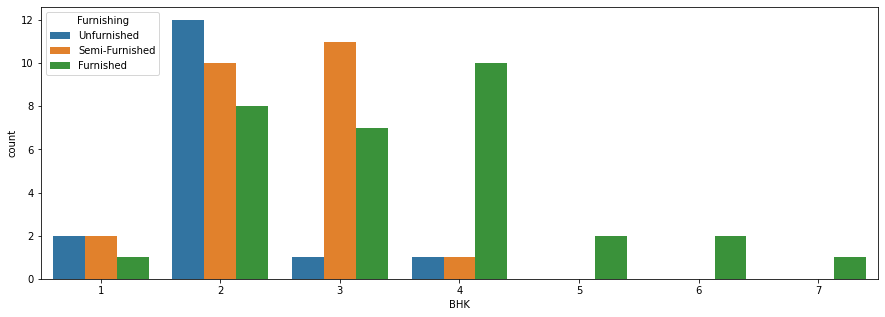

In [46]:
plt.figure(figsize=(15,5))
g = sns.countplot(x = 'BHK', hue='Furnishing' ,data = df[df.apply(lambda x: 'Shahdara' in x.Locality, axis=1)])

In [49]:
df.iloc[509:513, 3] = 'Semi-Furnished'

In [50]:
df[df['Type'].isna()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
509,450.0,2,2.0,Semi-Furnished,"Gandhi Nagar, Shahdara",0.0,2900000,Ready_to_move,Resale,NaN
510,540.0,5,2.0,Semi-Furnished,"Gandhi Nagar, Shahdara",0.0,17000000,Ready_to_move,Resale,NaN
511,1350.0,3,3.0,Semi-Furnished,"Gandhi Nagar, Shahdara",0.0,25000000,Ready_to_move,Resale,NaN
512,2250.0,3,2.0,Semi-Furnished,"Gandhi Nagar, Shahdara",0.0,10000000,Ready_to_move,Resale,NaN


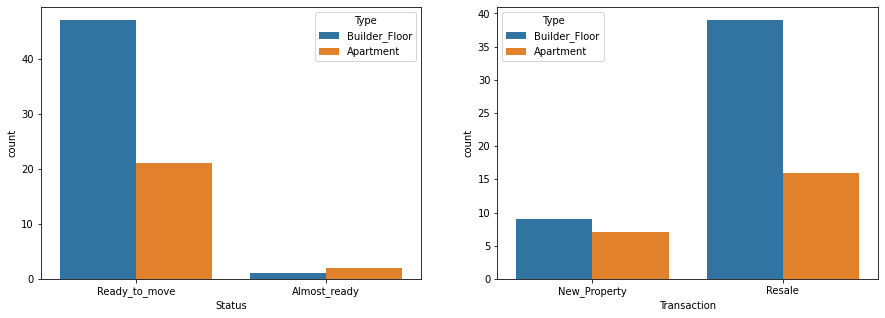

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
g = sns.countplot(x = 'Status', hue='Type' ,data = df[df.apply(lambda x: 'Shahdara' in x.Locality, axis=1)])
plt.subplot(1,2,2)
g = sns.countplot(x = 'Transaction', hue='Type' ,data = df[df.apply(lambda x: 'Shahdara' in x.Locality, axis=1)])

In [58]:
df.iloc[509:513, 9] = 'Builder_Floor'

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
dtype: int64

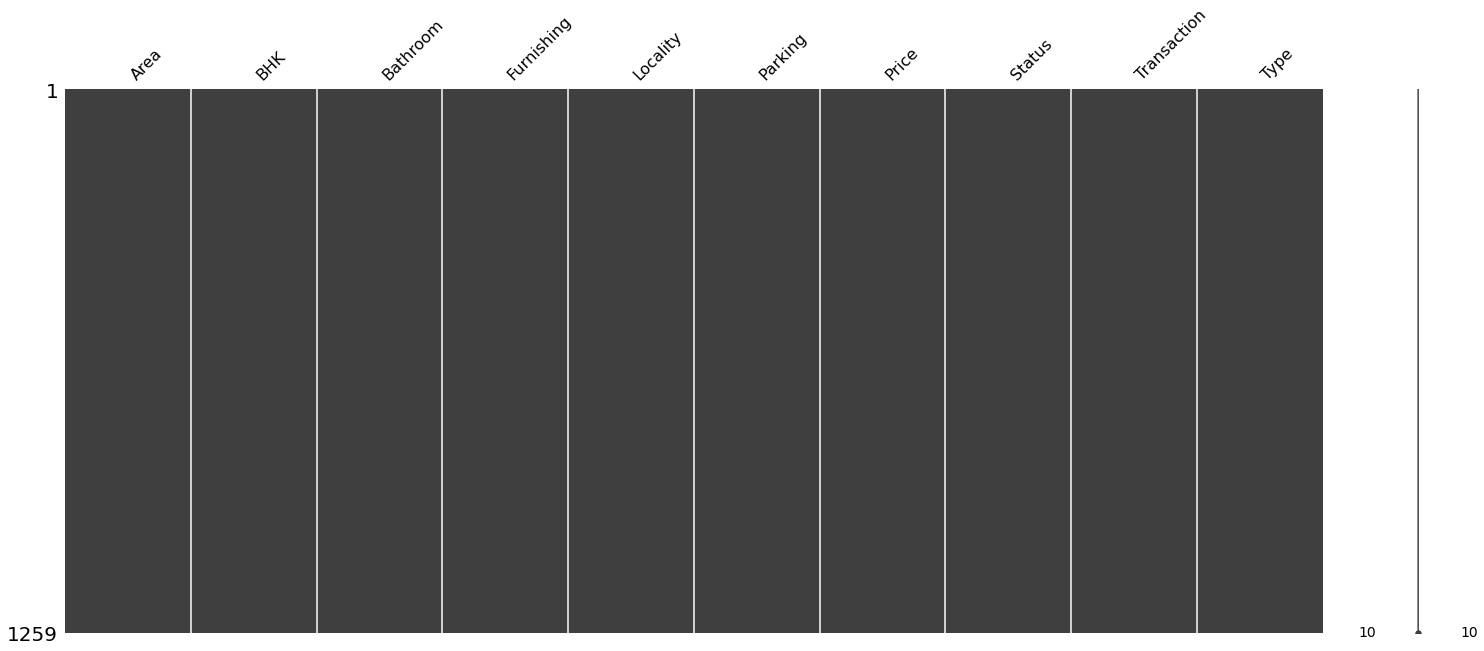

In [60]:
missingno.matrix(df)

#### Missing Values Fixed!

In [68]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1259 non-null   float64
 3   Furnishing   1259 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1259 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1259 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 98.5+ KB


In [91]:
df['Bathroom'] = df.Bathroom.astype(int)
df['Parking'] = df.Parking.astype(int)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1259 non-null   int64  
 3   Furnishing   1259 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1259 non-null   int64  
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1259 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 98.5+ KB


In [109]:
numerical_cols = ['Area','Price']
ordinal_cols = ['BHK','Bathroom','Parking']
nominal_cols = ['Furnishing','Status','Transaction','Type']

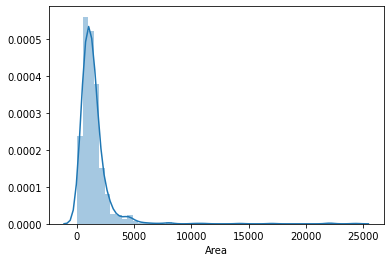

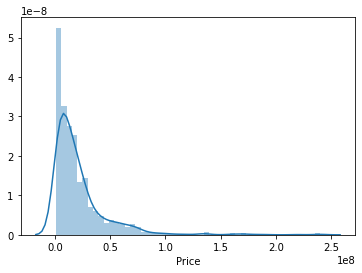

In [139]:
for numc in numerical_cols:
    plt.figure()
    sns.distplot(df[numc])

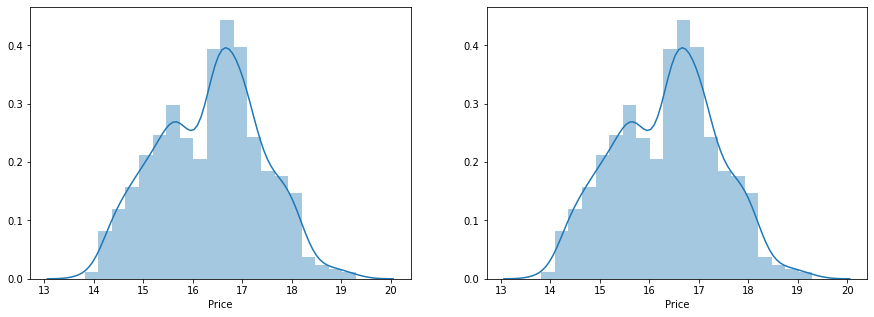

In [156]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(np.log(df.Price))
plt.subplot(1,2,2)
sns.distplot(np.log(df.Price))

In [157]:
df['Area_log'] = np.log(df.Area)
df['Price_log'] = np.log(df.Price)

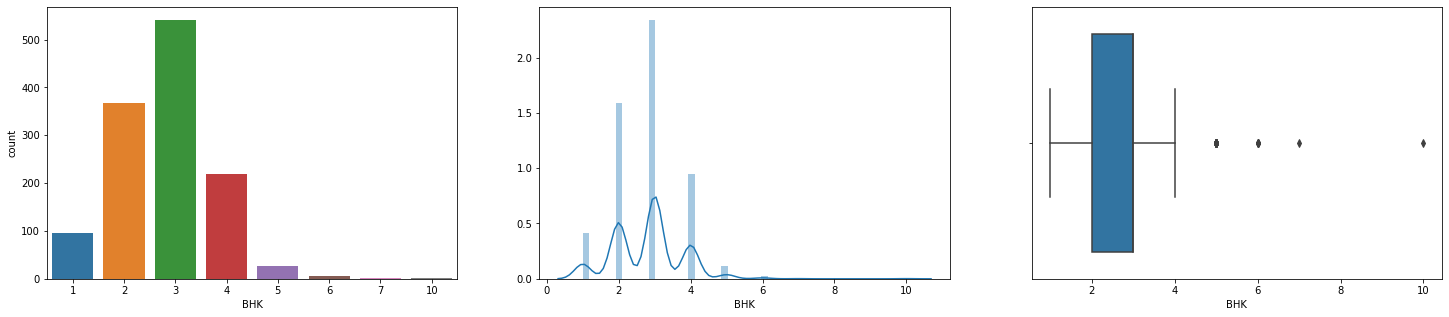

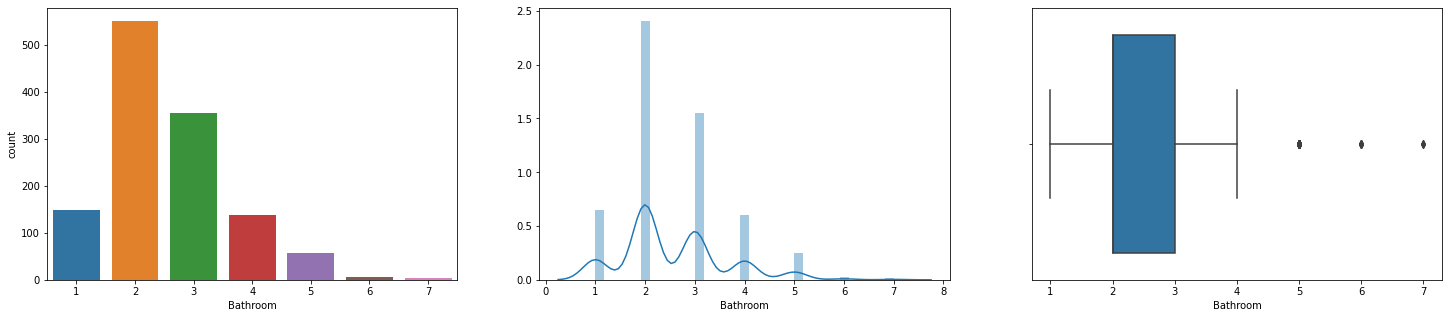

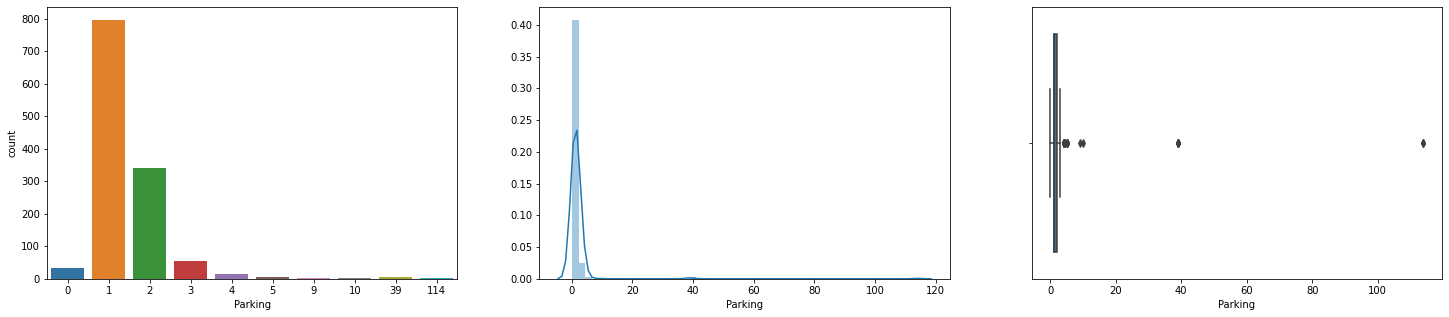

In [134]:
for ordc in ordinal_cols:
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    sns.countplot(df[ordc])
    plt.subplot(1,3,2)
    sns.distplot(df[ordc])
    plt.subplot(1,3,3)
    sns.boxplot(df[ordc])

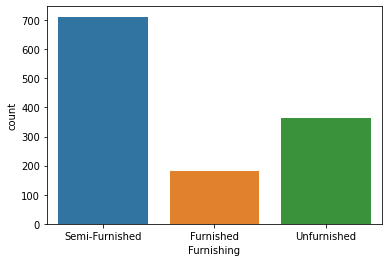

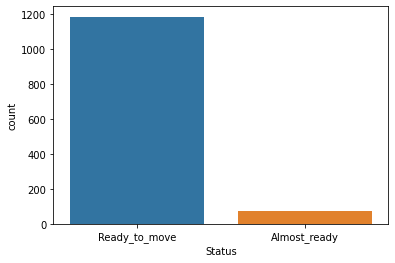

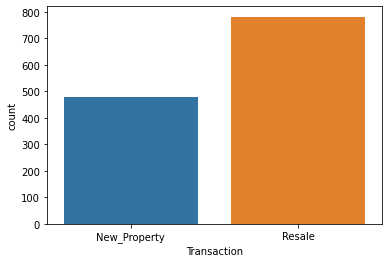

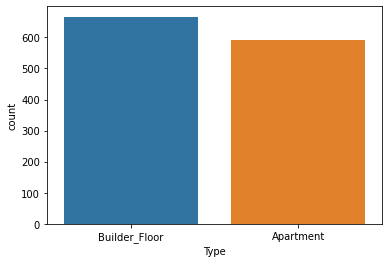

In [132]:
for nomc in nominal_cols:
    plt.figure()
    sns.countplot(df[nomc])

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1259 non-null   int64  
 3   Furnishing   1259 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1259 non-null   int64  
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1259 non-null   object 
 10  Area_log     1259 non-null   float64
 11  Price_log    1259 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 118.2+ KB


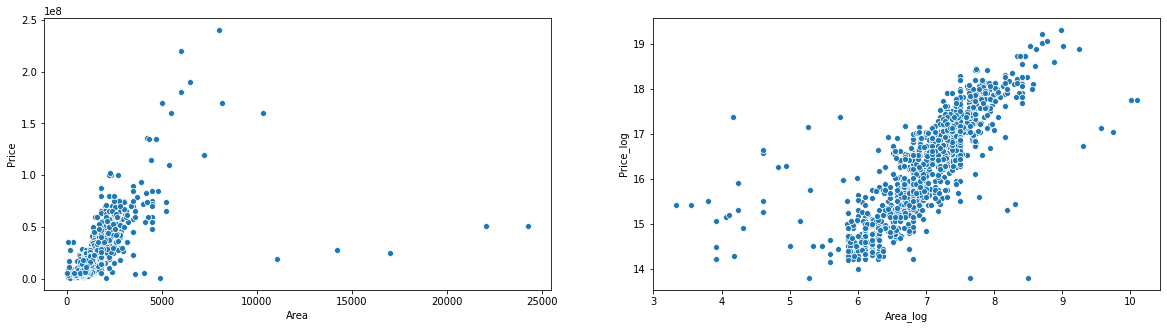

In [188]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(x='Area',y='Price',data=df)
plt.subplot(1,2,2)
sns.scatterplot(x='Area_log', y='Price_log', data=df)

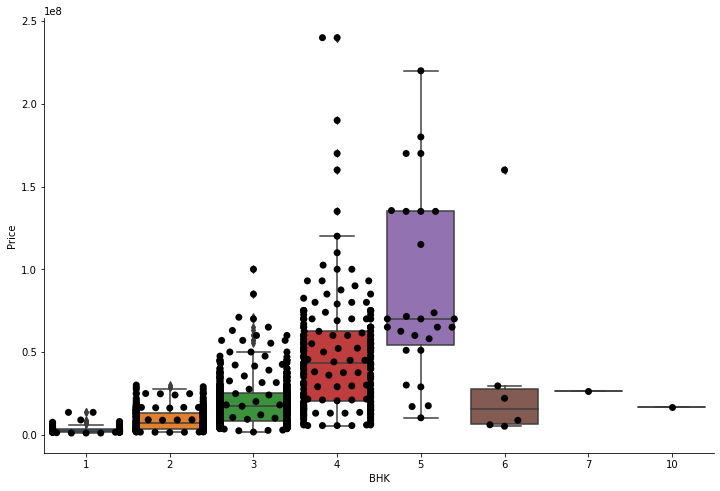

In [163]:
g = sns.boxplot(y = 'Price', x = 'BHK', data = df)
g = sns.swarmplot(y = 'Price',x = 'BHK', data = df, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

In [177]:
df['BHK'].replace([6,7,10],5,inplace = True)

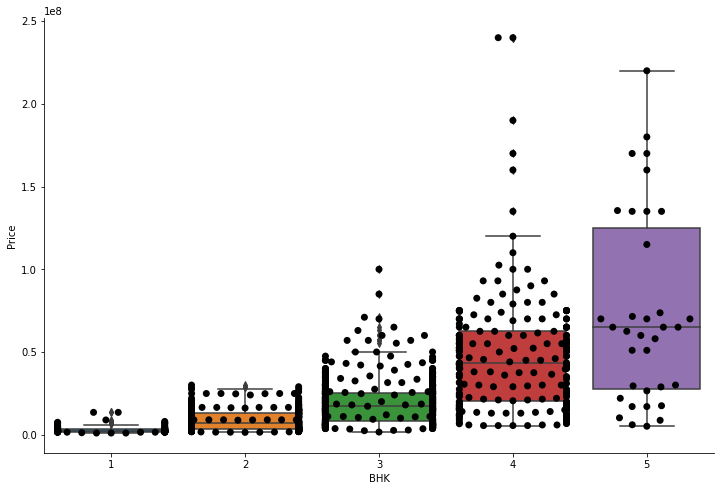

In [178]:
g = sns.boxplot(y = 'Price', x = 'BHK', data = df)
g = sns.swarmplot(y = 'Price',x = 'BHK', data = df, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

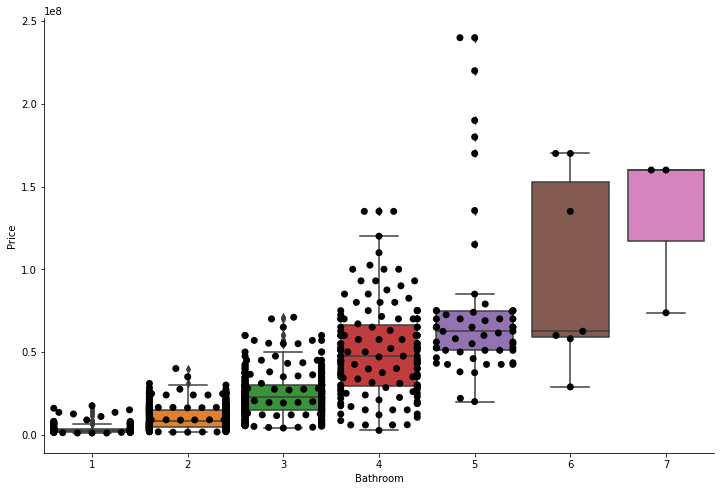

In [168]:
g = sns.boxplot(y = 'Price', x = 'Bathroom', data = df)
g = sns.swarmplot(y = 'Price',x = 'Bathroom', data = df, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

In [179]:
df['Bathroom'].replace([6,7],5,inplace = True)

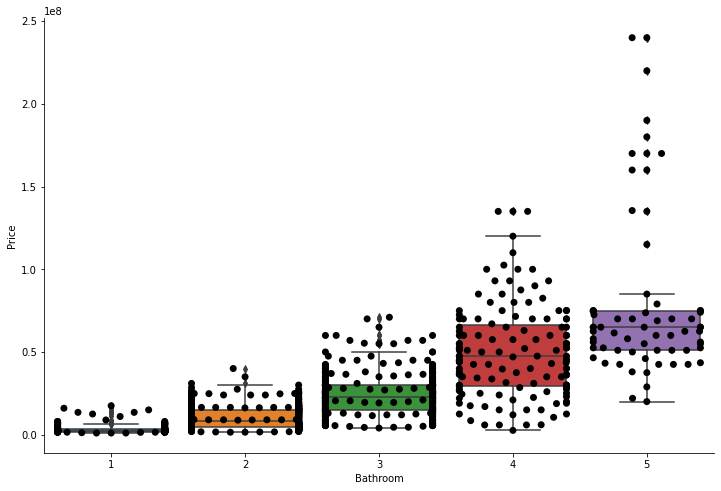

In [180]:
g = sns.boxplot(y = 'Price', x = 'Bathroom', data = df)
g = sns.swarmplot(y = 'Price',x = 'Bathroom', data = df, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

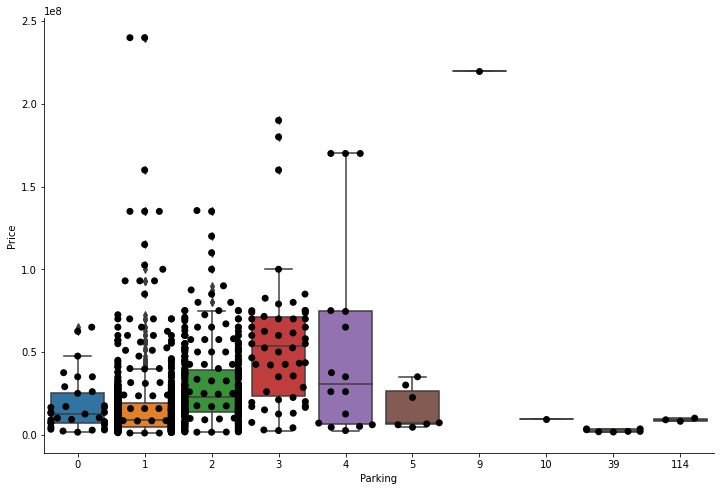

In [173]:
g = sns.boxplot(y = 'Price', x = 'Parking', data = df)
g = sns.swarmplot(y = 'Price',x = 'Parking', data = df, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

In [184]:
df.Parking.replace([9,10,39,114],5, inplace=True)

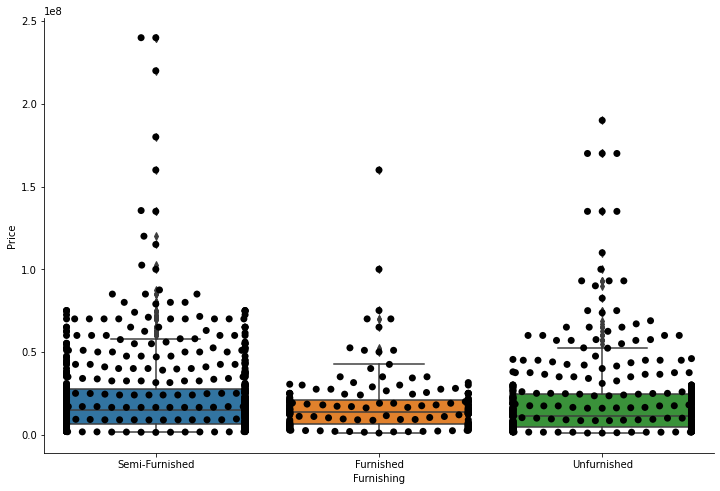

In [190]:
g = sns.boxplot(y = 'Price', x = 'Furnishing', data = df)
g = sns.swarmplot(y = 'Price',x = 'Furnishing', data = df, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

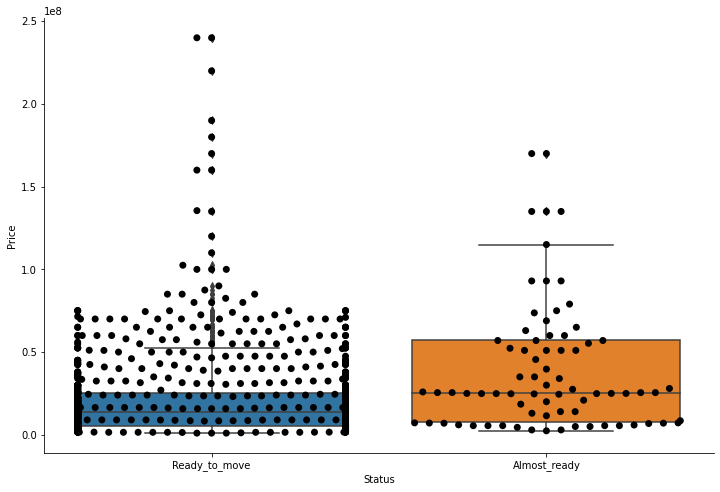

In [191]:
g = sns.boxplot(y = 'Price', x = 'Status', data = df)
g = sns.swarmplot(y = 'Price',x = 'Status', data = df, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

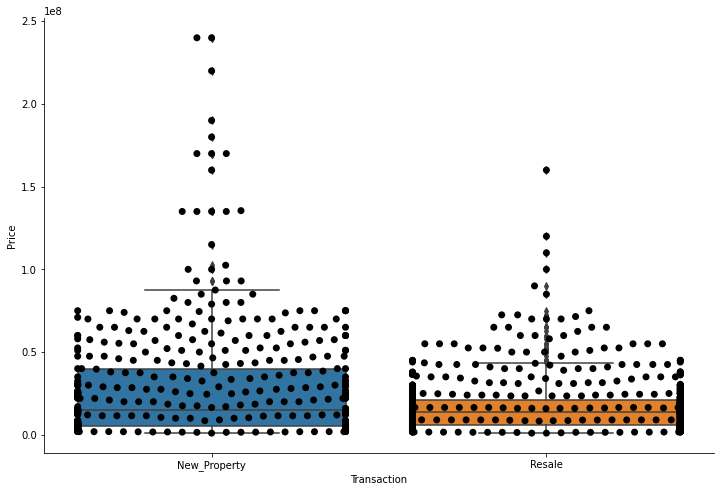

In [192]:
g = sns.boxplot(y = 'Price', x = 'Transaction', data = df)
g = sns.swarmplot(y = 'Price',x = 'Transaction', data = df, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

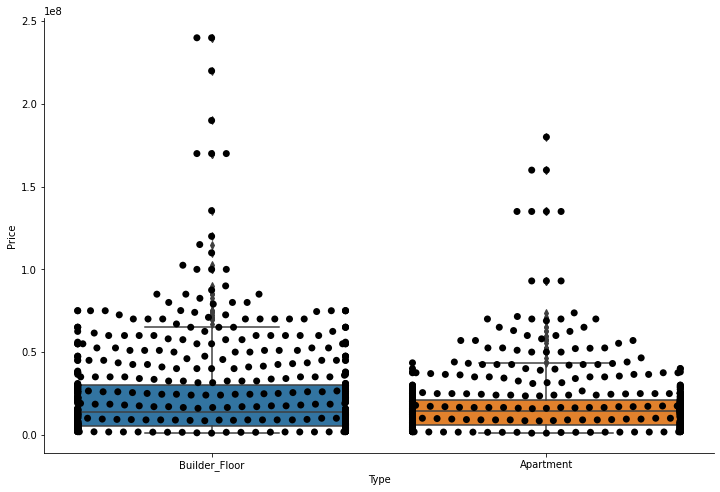

In [193]:
g = sns.boxplot(y = 'Price', x = 'Type', data = df)
g = sns.swarmplot(y = 'Price',x = 'Type', data = df, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()